## Log parser

In [71]:
import os
import re
from collections import defaultdict, OrderedDict

In [72]:
#log_filename = "data/wetransfer-13a737/VN_0.2_0.01.log"
log_filename = "SEIRD_output_state.txt"
dim = 20,20
patt_out_line = "State for model (.+?) is <total_.*? ([0-9]+)>"

In [73]:
COLOR_SUSCEPTIBLE = "#3498db"
COLOR_INFECTED = "#e74c3c"
COLOR_EXPOSED = "#f1c40f"
COLOR_RECOVERED = "#2ecc71"
COLOR_DEAD = "#9b59b6"

In [75]:
current_vals = OrderedDict()
data = []

with open(log_filename, "r") as log_file:
    for line in log_file:
        line = line.strip()
        
        if re.match("[0-9.]+", line):
            current_vals["time"] = line
            
            if len(current_vals) > 1 and (len(data) == 0 or data[-1][0] != float(line)):
                row = [float(current_vals["time"])] + list(map(int, list(current_vals.values())[1:]))
                data.append(row)
            continue
        
        match = re.match(patt_out_line, line)
        if not match:
            raise RuntimeError("Unexpected line: '%s'" % line)
            
        state, val = match.groups()
        current_vals[state] = val

In [76]:
data[:3]

[[0.0, 0, 0, 100, 0, 99900],
 [0.1, 0, 0, 100, 0, 99900],
 [0.2, 0, 0, 100, 0, 99876]]

## Dataframe creation and visualization

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df = pd.DataFrame(data, columns=current_vals.keys())
#df = df.set_index("time")
df.head()

,time,recovered,deceased,infective,exposed,susceptible
0,0.0,0,0,100,0,99900
1,0.1,0,0,100,0,99900
2,0.2,0,0,100,0,99876
3,0.3,0,0,100,24,99852
4,0.4,0,0,100,48,99828


In [85]:
df_vis = df[df["time"] < 125]
df_vis = df_vis.set_index("time")
df_vis.head()

,recovered,deceased,infective,exposed,susceptible
time,,,,,
0.0,0,0,100,0,99900
0.1,0,0,100,0,99900
0.2,0,0,100,0,99876
0.3,0,0,100,24,99852
0.4,0,0,100,48,99828


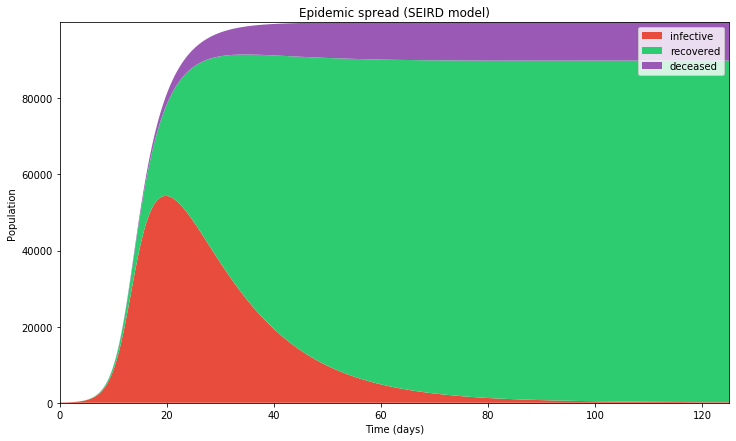

In [90]:
base_name = os.path.splitext(os.path.basename(log_filename))[0]

col_names = ["infective", "recovered", "deceased"]
colors=[COLOR_INFECTED, COLOR_RECOVERED, COLOR_DEAD]

x = list(df_vis.index)
y = np.vstack([df_vis[col] for col in col_names])

fig, ax = plt.subplots(figsize=(12,7))
ax.stackplot(x, y, labels=col_names, colors=colors)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Epidemic spread (SEIRD model)')
#plt.show()
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.savefig(base_name + "_area.png")

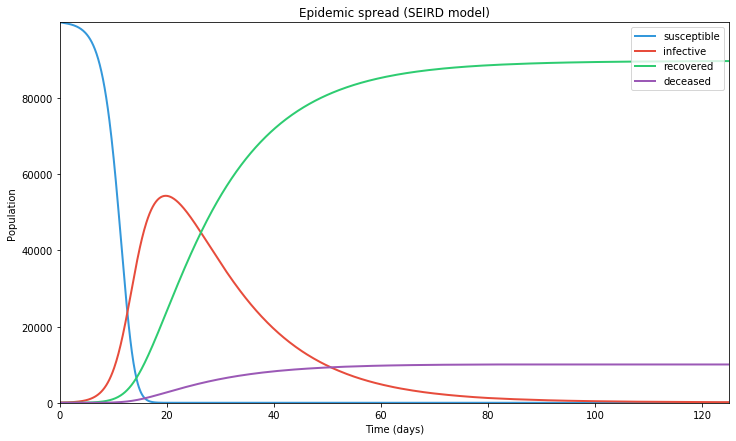

In [91]:
fig, ax = plt.subplots(figsize=(12,7))
linewidth = 2

x = list(df_vis.index)
ax.plot(x, df_vis["susceptible"], label="susceptible", color=COLOR_SUSCEPTIBLE, linewidth=linewidth)
#ax.plot(x, df_vis["exposed"], label="exposed", color=COLOR_EXPOSED, linewidth=linewidth)
ax.plot(x, df_vis["infective"], label="infective", color=COLOR_INFECTED, linewidth=linewidth)
ax.plot(x, df_vis["recovered"], label="recovered", color=COLOR_RECOVERED, linewidth=linewidth)
ax.plot(x, df_vis["deceased"], label="deceased", color=COLOR_DEAD, linewidth=linewidth)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Epidemic spread (SEIRD model)')
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.savefig(base_name + "_lines.png")